In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oyewoleabisola","key":"ffe3ff1d7dffb3105b0036ae40615524"}'}

In [2]:
from os import makedirs, path

# Use makedirs with exist_ok, it's available in older versions and works like mkdir with exist_ok
makedirs(name=path.expanduser('~/.kaggle'), mode=0o777, exist_ok=True)

# Continue with your code...
!cp kaggle.json ~/.kaggle/

#permission
!chmod 600 ~/.kaggle/kaggle.json


! kaggle datasets download murtozalikhon/brain-tumor-multimodal-image-ct-and-mri
! unzip /content/brain-tumor-multimodal-image-ct-and-mri.zip


Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (10).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (100).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1000).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1001).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1002).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1003).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1004).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1005).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1006).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1007).jpg  
  inflating: Dataset/Brain Tumor MRI images/Healthy/mri_healthy (1008).jpg  
  inflating: Dataset/Brain Tumo

In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os

In [4]:

root = "/content/Dataset"

image_files = []
classes = []

for folder_name in ["Brain Tumor CT scan Images", "Brain Tumor MRI images"]:
    folder_path = os.path.join(root, folder_name)
    #print(f"Checking folder: {folder_path}")

    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for class_name in ["Healthy", "Tumor"]:
            class_path = os.path.join(folder_path, class_name)
            #print(f"Checking class folder: {class_path}")

            if os.path.exists(class_path) and os.path.isdir(class_path):
                for image_file in os.listdir(class_path):
                    print(f"Found file: {image_file}")
                    if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                        image_files.append(os.path.join(class_path, image_file))
                        classes.append(class_name)

data = {
    "ImageFile": image_files,
    "Class": classes
}
df = pd.DataFrame(data)

df.head()

Found file: ct_healthy (990).jpg
Found file: ct_healthy (640).jpg
Found file: ct_healthy (99).png
Found file: ct_healthy (1706).jpg
Found file: ct_healthy (707).jpg
Found file: ct_healthy (30).png
Found file: ct_healthy (680).jpg
Found file: ct_healthy (931).jpg
Found file: ct_healthy (1589).jpg
Found file: ct_healthy (623).jpg
Found file: ct_healthy (1275).jpg
Found file: ct_healthy (1282).jpg
Found file: ct_healthy (1366).jpg
Found file: ct_healthy (325).png
Found file: ct_healthy (1010).jpg
Found file: ct_healthy (1287).jpg
Found file: ct_healthy (476).jpg
Found file: ct_healthy (322).png
Found file: ct_healthy (1433).jpg
Found file: ct_healthy (1475).jpg
Found file: ct_healthy (8).jpg
Found file: ct_healthy (179).png
Found file: ct_healthy (349).jpg
Found file: ct_healthy (906).jpg
Found file: ct_healthy (774).jpg
Found file: ct_healthy (1118).jpg
Found file: ct_healthy (1108).jpg
Found file: ct_healthy (1703).jpg
Found file: ct_healthy (602).jpg
Found file: ct_healthy (740).jpg
Fo

,ImageFile,Class
0,/content/Dataset/Brain Tumor CT scan Images/He...,Healthy
1,/content/Dataset/Brain Tumor CT scan Images/He...,Healthy
2,/content/Dataset/Brain Tumor CT scan Images/He...,Healthy
3,/content/Dataset/Brain Tumor CT scan Images/He...,Healthy
4,/content/Dataset/Brain Tumor CT scan Images/He...,Healthy


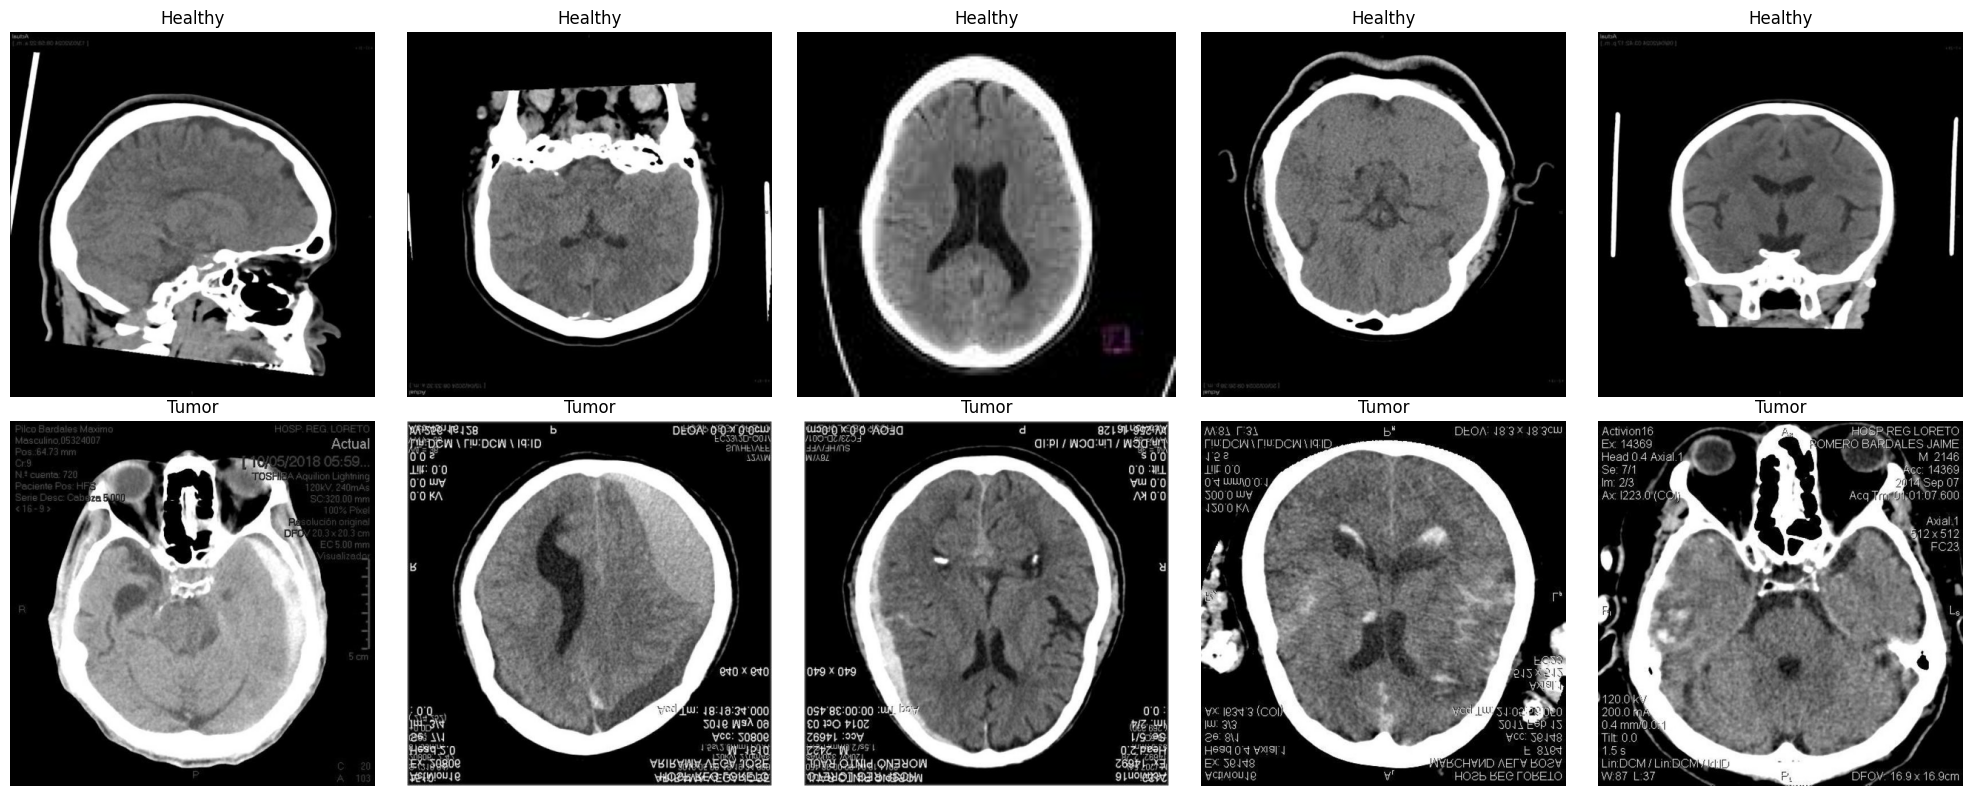

In [5]:



# Create a subset of the dataframe with 5 Healthy and 5 Tumor images
healthy_df = df[df["Class"] == "Healthy"].head(5)
tumor_df = df[df["Class"] == "Tumor"].head(5)
subset_df = pd.concat([healthy_df, tumor_df])


fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # Create a 2x5 grid of subplots

for i, (index, row) in enumerate(subset_df.iterrows()):
    image_path = row["ImageFile"]
    class_name = row["Class"]

    try:
        img = mpimg.imread(image_path)
        row_index = i // 5
        col_index = i % 5
        axes[row_index, col_index].imshow(img)
        axes[row_index, col_index].set_title(f"{class_name}")
        axes[row_index, col_index].axis('off') # Hide axes
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")

plt.tight_layout()
plt.show()


In [6]:
df["Class"].value_counts()


,count
Class,
Tumor,5318
Healthy,4300


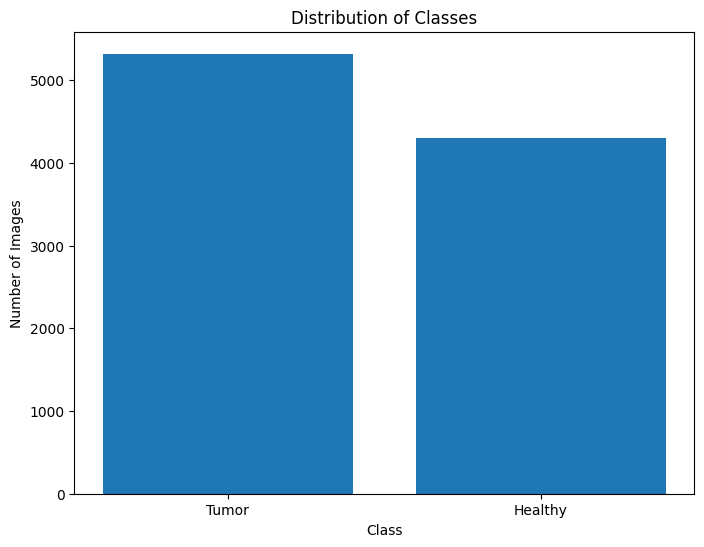

In [7]:

import matplotlib.pyplot as plt

# Count occurrences of each class
class_counts = df['Class'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes")
plt.show()


In [8]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn.functional as F
import cv2


In [9]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
])
# Calculate mean and std for your dataset
dataset = datasets.ImageFolder(root=root,transform=transform )

loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)
mean = 0.
std = 0.
for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)

mean /= len(loader.dataset)
std /= len(loader.dataset)

print(f"Mean: {mean.item()}, Std: {std.item()}")

Mean: 0.2234388291835785, Std: 0.24283750355243683


In [10]:
normalize=transforms.Normalize(mean=mean.item(),std=std.item())
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    normalize])

random_augmentation = transforms.RandomApply(nn.ModuleList([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomPerspective(),
    transforms.RandomRotation((60, 300)),
    transforms.RandomErasing(scale=(0.01, 0.1), p=0.3),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
]))
from sklearn.model_selection import train_test_split

# Get targets (labels) from the dataset
targets = [target for _, target in dataset]

# Split into train and remaining (val + test)
train_indices, remaining_indices, _, _ = train_test_split(
    range(len(dataset)), targets, test_size=0.2, stratify=targets, random_state=42
)

# Split remaining into validation and test
val_indices, test_indices, _, _ = train_test_split(
    remaining_indices, [targets[i] for i in remaining_indices], test_size=0.5, stratify=[targets[i] for i in remaining_indices], random_state=42
)

# Create subsets
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)
test_dataset = torch.utils.data.Subset(dataset, test_indices)


# Convert Train_data to Agumented Dataset
class AugmentedDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        image, label = self.dataset[index]
        image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.dataset)

# wrap datasets in Dataloder
train_loader = DataLoader(AugmentedDataset(train_dataset, random_augmentation), batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Testing set size:", len(test_dataset))




Training set size: 7694
Validation set size: 962
Testing set size: 962


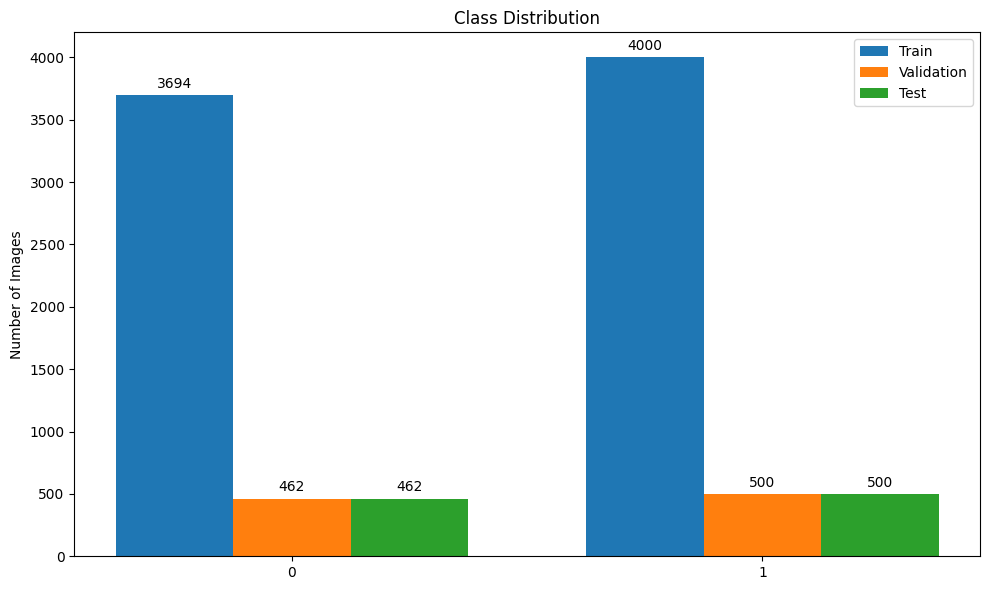

In [12]:

import numpy as np
import matplotlib.pyplot as plt

def plot_class_distribution(train_dataset, val_dataset, test_dataset):
    train_classes = [label for _, label in train_dataset]
    val_classes = [label for _, label in val_dataset]
    test_classes = [label for _, label in test_dataset]

    train_counts = [train_classes.count(i) for i in sorted(list(set(train_classes)))]
    val_counts = [val_classes.count(i) for i in sorted(list(set(val_classes)))]
    test_counts = [test_classes.count(i) for i in sorted(list(set(test_classes)))]

    labels = sorted(list(set(train_classes))) # Assuming labels are the same across datasets

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width, train_counts, width, label='Train')
    rects2 = ax.bar(x, val_counts, width, label='Validation')
    rects3 = ax.bar(x + width, test_counts, width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Images')
    ax.set_title('Class Distribution')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.show()

plot_class_distribution(train_dataset, val_dataset, test_dataset)


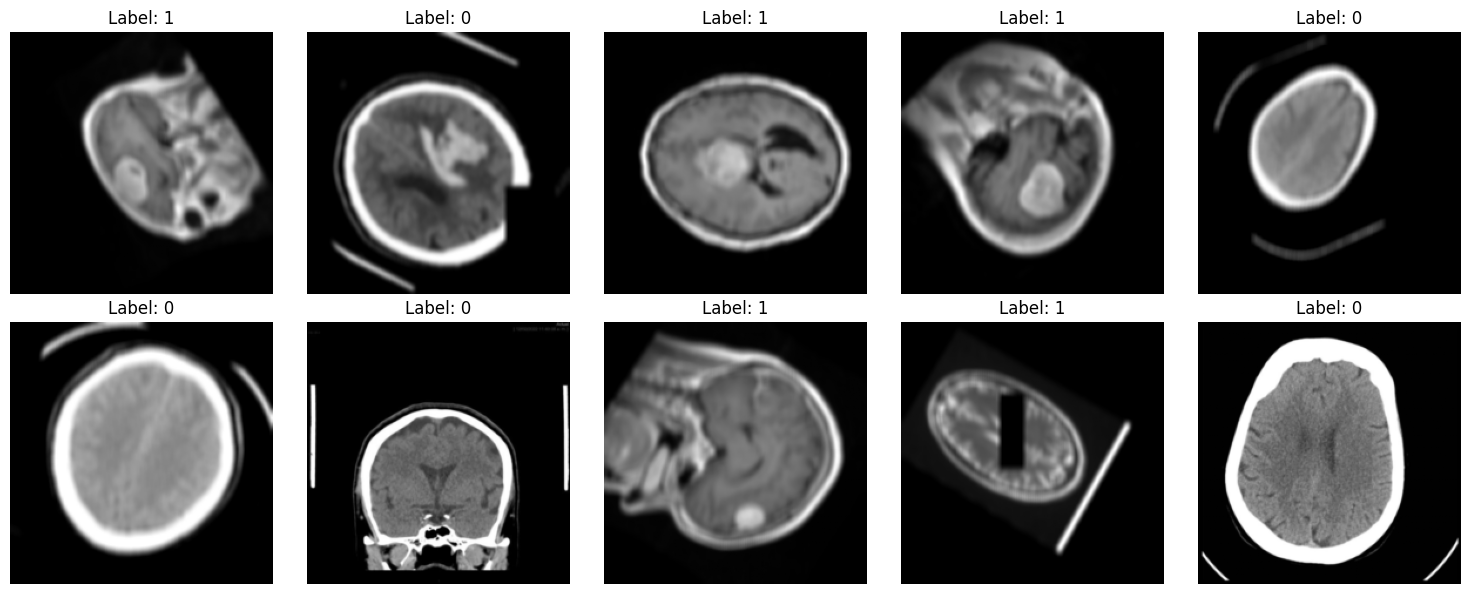

In [13]:

# Visual the image after transformation
import matplotlib.pyplot as plt
# Get a batch of images from the training data loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Display the first 10 transformed images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    image = images[i].squeeze().numpy()
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
|'''import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

class PatchEmbedding(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=1, embed_dim=768):
        super(PatchEmbedding, self).__init__()

        # Input dimensions
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2

        # Linear projection layer to map patches to embedding dimension
        self.projection = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Learnable [CLS] token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

    def forward(self, x):
        # Input shape: (batch_size, in_channels, img_size, img_size)
        batch_size = x.size(0)

        # Apply the convolutional projection to extract patches
        x = self.projection(x)  # Shape: (batch_size, embed_dim, num_patches^0.5, num_patches^0.5)

        # Flatten the patches
        x = x.flatten(2).transpose(1, 2)  # Shape: (batch_size, num_patches, embed_dim)

        # Add the [CLS] token
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)  # Shape: (batch_size, 1, embed_dim)
        x = torch.cat((cls_tokens, x), dim=1)  # Shape: (batch_size, num_patches + 1, embed_dim)

        return x


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Add positional encoding to the input
        x = x + self.pe[:, :x.size(1), :]
        return x


class MultiHeadSelfAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"
        self.d_model = d_model
        self.num_heads = num_heads
        self.depth = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.fc_out = nn.Linear(d_model, d_model)

    def split_heads(self, x):
        batch_size, seq_len, d_model = x.shape
        x = x.view(batch_size, seq_len, self.num_heads, self.depth)
        x = x.transpose(1, 2)  # Shape: (batch_size, num_heads, seq_len, depth)
        return x

    def forward(self, q, k, v):
        batch_size = q.size(0)

        # Linear transformations
        q = self.q_linear(q)  # Shape: (batch_size, seq_len, d_model)
        k = self.k_linear(k)
        v = self.v_linear(v)

        # Split heads
        q = self.split_heads(q)  # Shape: (batch_size, num_heads, seq_len, depth)
        k = self.split_heads(k)
        v = self.split_heads(v)

        # Scaled dot-product attention
        scores = torch.matmul(q, k.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.depth, dtype=torch.float32))
        attention_weights = F.softmax(scores, dim=-1)
        attention_output = torch.matmul(attention_weights, v)

        # Combine heads
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)

        # Final linear transformation
        output = self.fc_out(attention_output)
        return output


class FeedForwardNetwork(nn.Module):
    def __init__(self, d_model, d_ff):
        super(FeedForwardNetwork, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        x = F.gelu(self.fc1(x))  # Use GELU activation for better performance
        x = self.fc2(x)
        return x


class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super(TransformerEncoderBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(d_model, num_heads)
        self.ffn = FeedForwardNetwork(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Multi-head self-attention with residual connection
        attn_output = self.attention(x, x, x)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward network with residual connection
        ffn_output = self.ffn(x)
        x = self.norm2(x + self.dropout(ffn_output))
        return x


class VisionTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=1, embed_dim=768,
                 num_heads=8, d_ff=2048, num_blocks=6, num_classes=2, dropout=0.1):
        super(VisionTransformer, self).__init__()

        # Patch embedding
        self.patch_embedding = PatchEmbedding(img_size=img_size, patch_size=patch_size,
                                              in_channels=in_channels, embed_dim=embed_dim)

        # Number of patches including [CLS] token
        self.num_patches = (img_size // patch_size) ** 2 + 1

        # Positional encoding
        self.positional_encoding = PositionalEncoding(d_model=embed_dim, max_len=self.num_patches)

        # Transformer encoder blocks
        self.encoder_blocks = nn.ModuleList([
            TransformerEncoderBlock(d_model=embed_dim, num_heads=num_heads,
                                    d_ff=d_ff, dropout=dropout) for _ in range(num_blocks)
        ])

        # Dropout layer
        self.dropout = nn.Dropout(dropout)

        # Classification head
        self.classification_head = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        # Patch embedding
        x = self.patch_embedding(x)  # Shape: (batch_size, num_patches + 1, embed_dim)

        # Add positional encoding
        x = self.positional_encoding(x)
        x = self.dropout(x)

        # Pass through transformer encoder blocks
        for block in self.encoder_blocks:
            x = block(x)

        # Take the [CLS] token representation for classification
        cls_token = x[:, 0, :]  # Shape: (batch_size, embed_dim)

        # Classification head
        output = self.classification_head(cls_token)  # Shape: (batch_size, num_classes)
        return output'''

In [14]:
import timm
import torch.nn as nn

# Load a pretrained ViT model
model = timm.create_model('vit_base_patch16_224', pretrained=True,in_chans=1)

# Modify the classifier head for your task
num_classes = 2
model.head = nn.Linear(model.head.in_features, num_classes)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [15]:
# Hyperparameters
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

#device='cuda' if torch.cuda.is_available() else 'cpu'
epochs=10
#model = VisionTransformer().to(device)
model.apply(init_weights)
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

best_val_loss = float('inf')
patience = 5
trigger_times = 0



train_loss_list, val_loss_list = [], []
train_accuracy_list, val_accuracy_list = [], []



def train(model, train_loader, criterion, optimizer,device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return running_loss / len(train_loader), correct / total

def validate(model, loader, criterion,device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return running_loss / len(loader), correct / total

for epoch in range(epochs):
    # Training loop
    train_loss, train_acc = train(model, train_loader, criterion, optimizer,device)

    # Validation loop
    val_loss, val_acc = validate(model, val_loader, criterion,device)

    # Append the results
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_acc)

    print(f'''EPOCH {epoch}:
     Training: loss = {train_loss_list[-1]:.4f} | accuracy = {train_accuracy_list[-1]:.2f}/100
     Validation: loss = {val_loss_list[-1]:.4f} | accuracy = {val_accuracy_list[-1]:.2f}/100
     ''')



    # Save the model
save_path = '/content/VIT1'
print(f'Saving model in {save_path}')
torch.save(model.state_dict(), save_path)



EPOCH 0:
     Training: loss = 1.3087 | accuracy = 0.56/100
     Validation: loss = 0.3760 | accuracy = 0.84/100
     
EPOCH 1:
     Training: loss = 0.3253 | accuracy = 0.86/100
     Validation: loss = 0.0977 | accuracy = 0.96/100
     
EPOCH 2:
     Training: loss = 0.3274 | accuracy = 0.91/100
     Validation: loss = 0.1321 | accuracy = 0.95/100
     
EPOCH 3:
     Training: loss = 0.1167 | accuracy = 0.96/100
     Validation: loss = 0.0640 | accuracy = 0.98/100
     
EPOCH 4:
     Training: loss = 0.1302 | accuracy = 0.95/100
     Validation: loss = 0.1284 | accuracy = 0.95/100
     
EPOCH 5:
     Training: loss = 0.0918 | accuracy = 0.97/100
     Validation: loss = 0.0673 | accuracy = 0.98/100
     
EPOCH 6:
     Training: loss = 0.0826 | accuracy = 0.97/100
     Validation: loss = 0.0278 | accuracy = 0.99/100
     
EPOCH 7:
     Training: loss = 0.0914 | accuracy = 0.97/100
     Validation: loss = 0.1972 | accuracy = 0.94/100
     
EPOCH 8:
     Training: loss = 0.0775 | accuracy

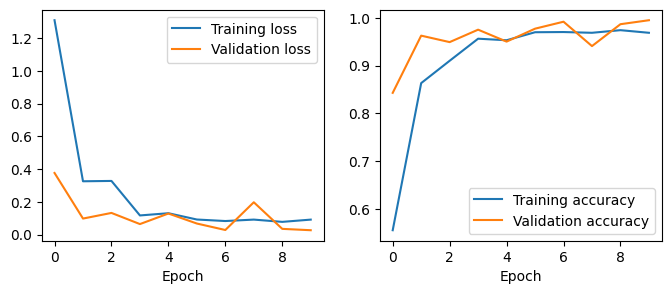

In [16]:
# Plot model performance accros the epochs
f, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].plot(train_loss_list, label='Training loss')
ax[0].plot(val_loss_list, label='Validation loss')
ax[0].set_xlabel('Epoch')
ax[0].legend()

ax[1].plot(train_accuracy_list, label='Training accuracy')
ax[1].plot(val_accuracy_list, label='Validation accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend()

f.show()

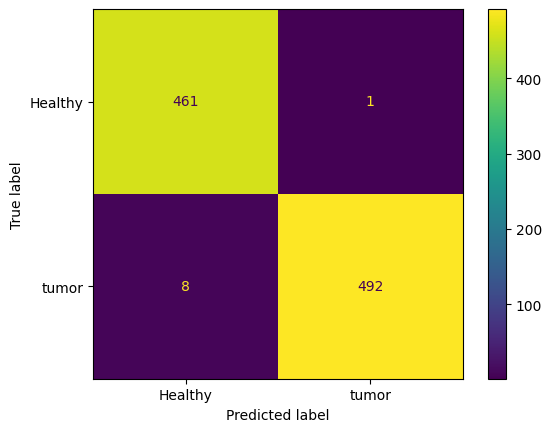

In [17]:
from sklearn import metrics

# Test
save_path = '/content/VIT1'
model.load_state_dict(torch.load(save_path))

model.eval()
predictions_list = []
with torch.no_grad():
    for image, label in test_dataset:
        image = image.to(device) # Move image to the device
        # label is already an integer and doesn't need to be moved
        # it will be converted to a tensor during loss calculation if needed


        output = model(image.unsqueeze(0)) # Get model output
        _, predicted = torch.max(output, 1) # Get the predicted class index
        predictions_list.append(predicted.item())
y_true = np.array([el[1] for el in test_dataset])  # Removed .item()
y_pred = np.array(predictions_list)

confusion_mat = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [ 'Healthy', 'tumor'])
cm_display.plot()

In [18]:
from sklearn.metrics import precision_score, f1_score, recall_score
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9906
Precision: 0.9980
F1-score: 0.9909
Recall: 0.9840
